In [38]:
from general_functions import get_cities, plot_loss_history, plot_final_path
from genetic_algo import genetic_algorithm
from sim_an_algo import simulated_annealing
import time
import numpy as np
import time
import matplotlib.pyplot as plt

We'll play around with 

Let's consider an example for which optimal path is visible (most of the times). So, the number of cities is around 8.

In [2]:
cities = get_cities('tsp_exp_8', use_existing=True, num_cities=8)

In [3]:
num_iter = 1_000
num_pop = 10
num_fittest = 2
early_stopping = True
stopping_threshold = 1e-8
start = time.time()
best_route_gen, history_gen = genetic_algorithm(cities, num_iter = num_iter, early_stopping = early_stopping, num_pop = num_pop,
                                                num_fittest = num_fittest, stopping_threshold = stopping_threshold)
end = time.time()

Iter    0 | Best Distance: 366.9652
Iter   10 | Best Distance: 366.9652
Early stopping at iteration 11 (improvement < 1e-08)


In [4]:
start - end

-0.034414052963256836

This seems okay (almost optimal).

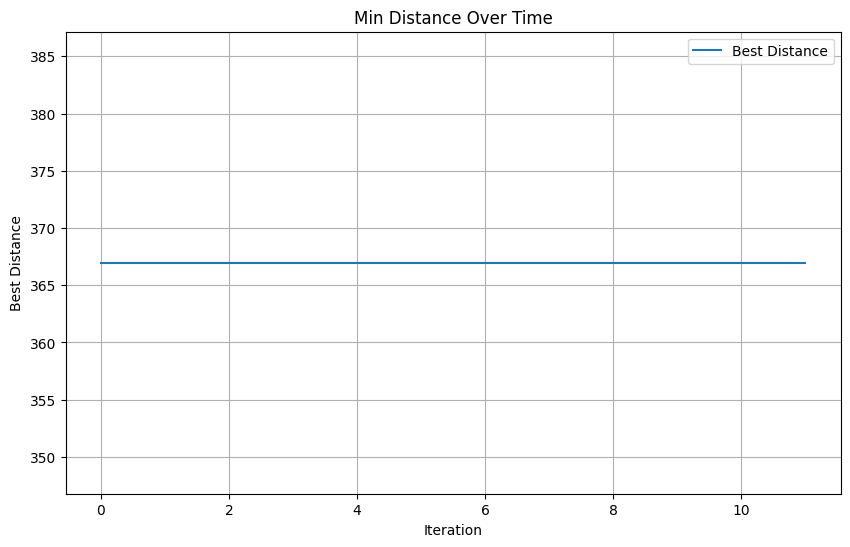

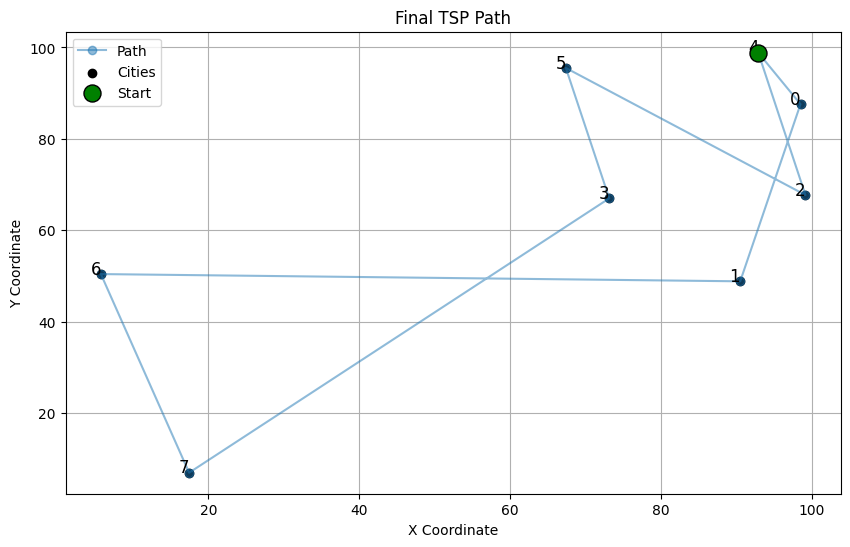

In [5]:
plot_loss_history(history_gen)
plot_final_path(cities, best_route_gen)

Now, let's increase number of elements per population.

Iter    0 | Best Distance: 380.7396
Iter   10 | Best Distance: 319.7783
Early stopping at iteration 11 (improvement < 1e-08)


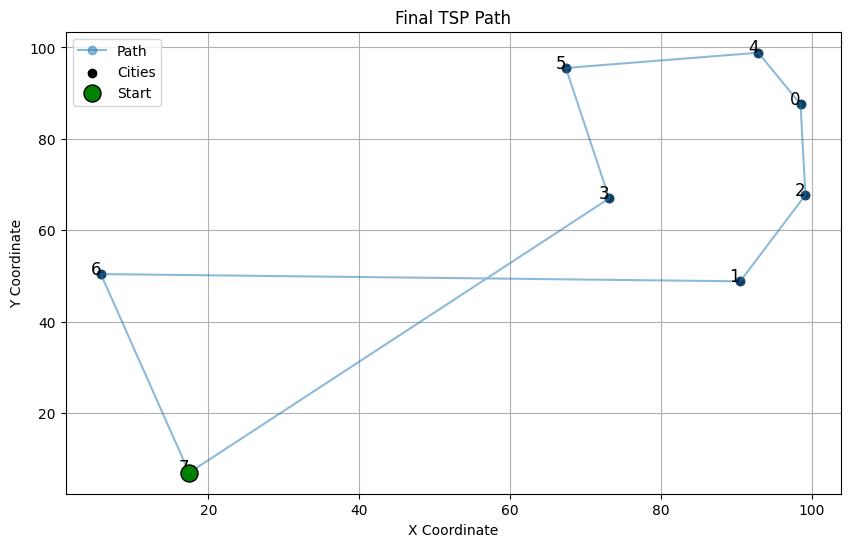

In [6]:
num_pop = 30
num_fittest = 2
start = time.time()
best_route_gen, history_gen = genetic_algorithm(cities, num_iter = num_iter, early_stopping = early_stopping, num_pop = num_pop,
                                                num_fittest = num_fittest, stopping_threshold = stopping_threshold)
end = time.time()
plot_final_path(cities, best_route_gen)

This seems more optimal than the previous one.

So, number of elements per population is indeed important. That's why an euristics was used:

`pop_size = max(50, min(10 * num_cities, 5000))`

So that `pop_size` would be between 50 and 5000.

Now, let's consider simulated annealing for the same set of cities.

In [7]:
initial_temp = 10000
cooling_rate = 0.95
min_temp = 0.00001
verbose = True
early_stopping = True
patience = 500
best_route_sim, history_sim = simulated_annealing(cities, initial_temp=initial_temp, cooling_rate=cooling_rate,
                                                  min_temp=min_temp, early_stopping=early_stopping, patience=patience)

Temp: 6302.49 | Current Cost: 365.31 | Best Cost: 357.12 | Iteration number: 10
Temp: 3773.54 | Current Cost: 465.85 | Best Cost: 357.12 | Iteration number: 20
Temp: 2259.36 | Current Cost: 382.79 | Best Cost: 352.49 | Iteration number: 30
Temp: 1352.76 | Current Cost: 414.98 | Best Cost: 352.49 | Iteration number: 40
Temp: 809.95 | Current Cost: 489.87 | Best Cost: 352.49 | Iteration number: 50
Temp: 484.95 | Current Cost: 366.03 | Best Cost: 352.49 | Iteration number: 60
Temp: 290.35 | Current Cost: 375.99 | Best Cost: 340.82 | Iteration number: 70
Temp: 173.85 | Current Cost: 369.18 | Best Cost: 340.82 | Iteration number: 80
Temp: 104.09 | Current Cost: 523.40 | Best Cost: 340.82 | Iteration number: 90
Temp: 62.32 | Current Cost: 395.40 | Best Cost: 340.82 | Iteration number: 100
Temp: 37.31 | Current Cost: 453.36 | Best Cost: 340.82 | Iteration number: 110
Temp: 22.34 | Current Cost: 375.74 | Best Cost: 340.82 | Iteration number: 120
Temp: 13.38 | Current Cost: 364.79 | Best Cost: 

As you can see, this path is different. So, methods can provide different results.

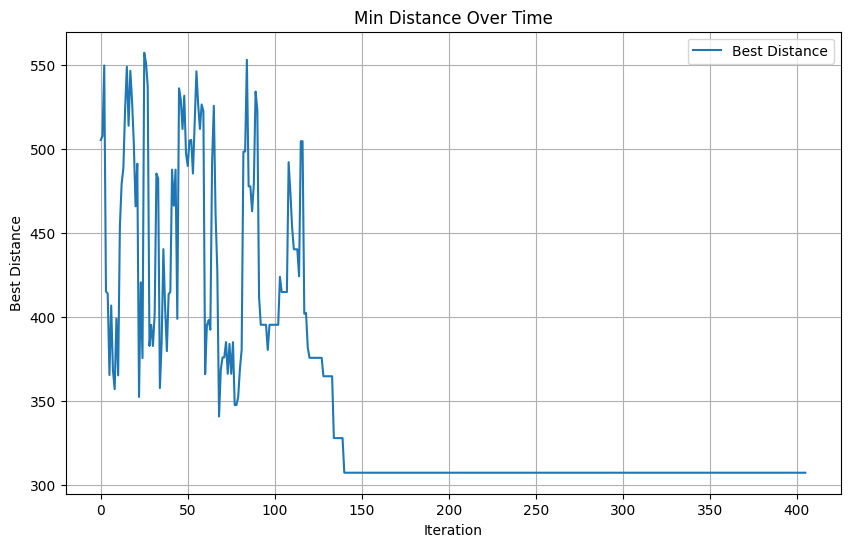

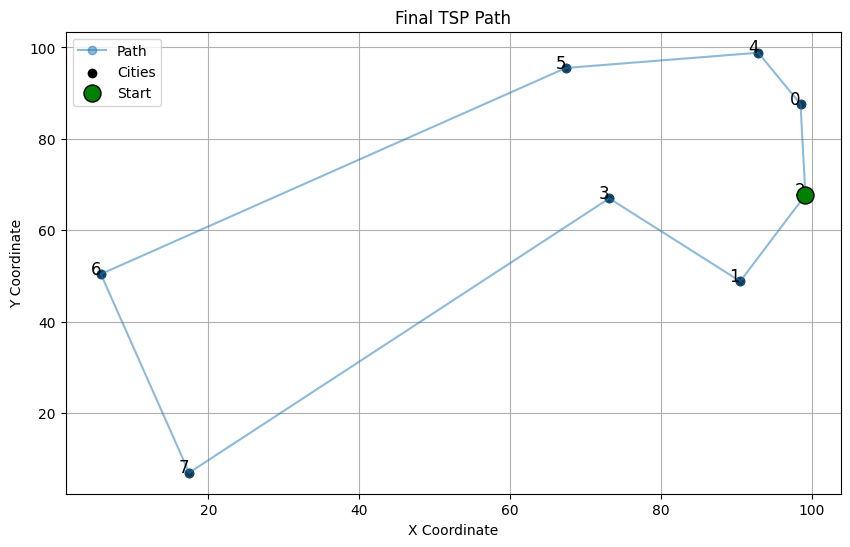

In [8]:
plot_loss_history(history_sim)
plot_final_path(cities, best_route_sim)

Now, let's increase number of cities to 30 and compare visually solutions (genetic vs annealing) for a couple of city-sets. 

In [9]:
cities = get_cities('tsp_exp_30', use_existing=False, num_cities=30)

In [21]:
num_iter = 50_000
num_fittest = 50
early_stopping = True
stopping_threshold = 1e-6
num_pop = 500
start = time.time()
best_route_gen, history_gen = genetic_algorithm(cities, num_iter = num_iter, num_pop = num_pop, early_stopping = early_stopping,
                                                num_fittest = num_fittest, stopping_threshold = stopping_threshold)
end = time.time()
print(end - start)

Iter    0 | Best Distance: 1299.9017
Iter   10 | Best Distance: 906.4023
Early stopping at iteration 11 (improvement < 1e-06)
15.746833086013794


In [34]:
initial_temp = 10_000_000
cooling_rate = 0.99
min_temp = 1e-8
verbose = True
early_stopping = True
patience = 5000
start = time.time()
best_route_sim, history_sim = simulated_annealing(cities, initial_temp=initial_temp, cooling_rate=cooling_rate,
                                                  min_temp=min_temp, early_stopping=early_stopping, patience=patience)
end = time.time()
print(end - start)

Temp: 9135172.47 | Current Cost: 1758.19 | Best Cost: 1743.27 | Iteration number: 10
Temp: 8261686.24 | Current Cost: 1634.87 | Best Cost: 1620.46 | Iteration number: 20
Temp: 7471720.94 | Current Cost: 1796.24 | Best Cost: 1574.30 | Iteration number: 30
Temp: 6757290.49 | Current Cost: 1642.18 | Best Cost: 1574.30 | Iteration number: 40
Temp: 6111172.40 | Current Cost: 1799.89 | Best Cost: 1574.30 | Iteration number: 50
Temp: 5526834.77 | Current Cost: 1755.13 | Best Cost: 1574.30 | Iteration number: 60
Temp: 4998370.30 | Current Cost: 1519.18 | Best Cost: 1353.65 | Iteration number: 70
Temp: 4520436.50 | Current Cost: 1551.21 | Best Cost: 1353.65 | Iteration number: 80
Temp: 4088201.74 | Current Cost: 1678.51 | Best Cost: 1353.65 | Iteration number: 90
Temp: 3697296.38 | Current Cost: 1653.42 | Best Cost: 1353.65 | Iteration number: 100
Temp: 3343768.57 | Current Cost: 1742.56 | Best Cost: 1353.65 | Iteration number: 110
Temp: 3024044.36 | Current Cost: 1580.39 | Best Cost: 1353.65 |

In [35]:
import numpy as np
print(f"Best result for Simulated Annealing {np.sort(history_sim)[0]:.2f} vs Genetic {np.sort(history_gen)[0]:.2f}")

Best result for Simulated Annealing 638.10 vs Genetic 906.40


Genetic algo results:

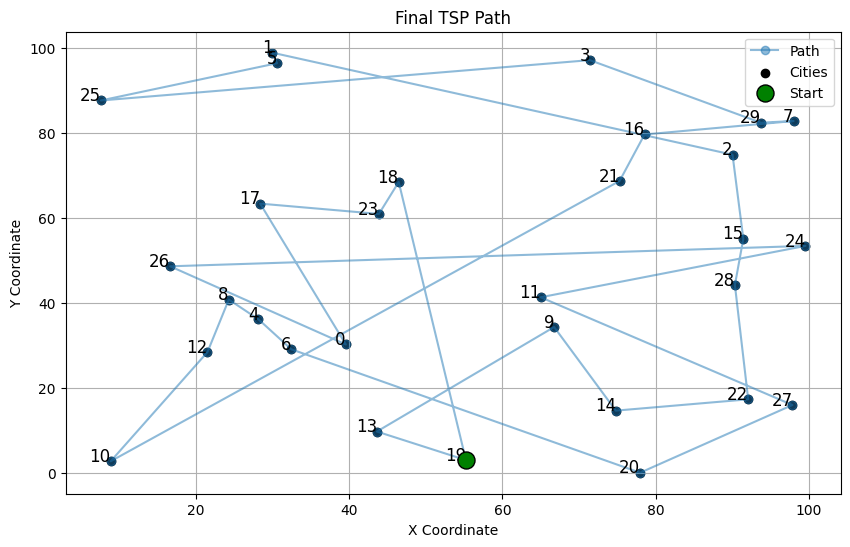

In [36]:
plot_final_path(cities, best_route_gen)

Simulated annealing results:

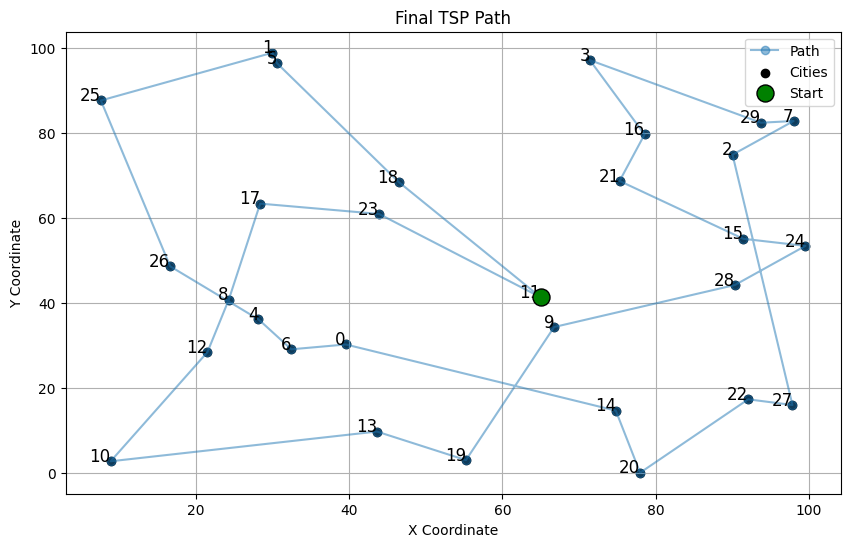

In [37]:
plot_final_path(cities, best_route_sim)

Genetic algorithm experiments

Experiment 1

In [70]:
num_iters = np.linspace(1e4, 1e6, num = 10, dtype=np.int32)
num_pop = 300
num_fittest = 5
early_stopping = True
stopping_threshold = 1e-8

best_results_experiment_1 = []

for num_iter in num_iters:
    best_route_gen, history_gen = genetic_algorithm(cities, num_iter=num_iter, num_pop=num_pop, early_stopping=early_stopping,
                                                   num_fittest=num_fittest, stopping_threshold=stopping_threshold)
    best_results_experiment_1.append(np.sort(history_gen)[0])

Iter    0 | Best Distance: 1290.5915
Iter   10 | Best Distance: 898.8454
Early stopping at iteration 13 (improvement < 1e-08)
Iter    0 | Best Distance: 1250.9888
Iter   10 | Best Distance: 969.1337
Early stopping at iteration 14 (improvement < 1e-08)
Iter    0 | Best Distance: 1371.0161
Iter   10 | Best Distance: 907.6069
Early stopping at iteration 11 (improvement < 1e-08)
Iter    0 | Best Distance: 1324.9846
Iter   10 | Best Distance: 976.7171
Early stopping at iteration 16 (improvement < 1e-08)
Iter    0 | Best Distance: 1348.6238
Iter   10 | Best Distance: 940.1029
Early stopping at iteration 18 (improvement < 1e-08)
Iter    0 | Best Distance: 1235.6390
Iter   10 | Best Distance: 941.2052
Early stopping at iteration 14 (improvement < 1e-08)
Iter    0 | Best Distance: 1287.1570
Iter   10 | Best Distance: 915.6002
Early stopping at iteration 11 (improvement < 1e-08)
Iter    0 | Best Distance: 1296.4019
Iter   10 | Best Distance: 896.9212
Early stopping at iteration 13 (improvement <

Experiment 2

In [71]:
num_iter = 20_000
num_pops = np.linspace(1e2, 2100, num = 10, dtype=np.int32)

best_results_experiment_2 = []

for num_pop in num_pops:
    best_route_gen, history_gen = genetic_algorithm(cities, num_iter=num_iter, num_pop=num_pop, early_stopping=early_stopping,
                                                   num_fittest=num_fittest, stopping_threshold=stopping_threshold)
    best_results_experiment_2.append(np.sort(history_gen)[0])

Iter    0 | Best Distance: 1344.4006
Iter   10 | Best Distance: 1001.5443
Early stopping at iteration 11 (improvement < 1e-08)
Iter    0 | Best Distance: 1291.9613
Iter   10 | Best Distance: 960.9473
Early stopping at iteration 13 (improvement < 1e-08)
Iter    0 | Best Distance: 1335.6181
Iter   10 | Best Distance: 967.9705
Early stopping at iteration 12 (improvement < 1e-08)
Iter    0 | Best Distance: 1213.5535
Iter   10 | Best Distance: 952.6335
Early stopping at iteration 12 (improvement < 1e-08)
Iter    0 | Best Distance: 1355.7409
Iter   10 | Best Distance: 942.6929
Early stopping at iteration 14 (improvement < 1e-08)
Iter    0 | Best Distance: 1291.8679
Iter   10 | Best Distance: 887.1135
Early stopping at iteration 13 (improvement < 1e-08)
Iter    0 | Best Distance: 1097.2355
Iter   10 | Best Distance: 881.6805
Early stopping at iteration 15 (improvement < 1e-08)
Iter    0 | Best Distance: 1241.1611
Iter   10 | Best Distance: 886.1401
Early stopping at iteration 11 (improvement 

Experiment 3

In [72]:
num_fittest_values = np.linspace(1, 20, num = 10, dtype=np.int32)

best_results_experiment_3 = []

for num_fittest in num_fittest_values:
    best_route_gen, history_gen = genetic_algorithm(cities, num_iter=num_iter, num_pop=300, early_stopping=early_stopping,
                                                   num_fittest=num_fittest, stopping_threshold=stopping_threshold)
    best_results_experiment_3.append(np.sort(history_gen)[0])

Iter    0 | Best Distance: 1338.4600
Iter   10 | Best Distance: 995.6191
Early stopping at iteration 13 (improvement < 1e-08)
Iter    0 | Best Distance: 1301.6000
Iter   10 | Best Distance: 926.9296
Early stopping at iteration 15 (improvement < 1e-08)
Iter    0 | Best Distance: 1271.8316
Iter   10 | Best Distance: 911.5864
Early stopping at iteration 11 (improvement < 1e-08)
Iter    0 | Best Distance: 1284.6404
Iter   10 | Best Distance: 980.9895
Early stopping at iteration 15 (improvement < 1e-08)
Iter    0 | Best Distance: 1241.0126
Iter   10 | Best Distance: 881.7846
Early stopping at iteration 11 (improvement < 1e-08)
Iter    0 | Best Distance: 1301.3028
Iter   10 | Best Distance: 969.7176
Early stopping at iteration 11 (improvement < 1e-08)
Iter    0 | Best Distance: 1351.7930
Iter   10 | Best Distance: 981.8322
Early stopping at iteration 13 (improvement < 1e-08)
Iter    0 | Best Distance: 1273.5487
Iter   10 | Best Distance: 944.2578
Early stopping at iteration 12 (improvement <

Results

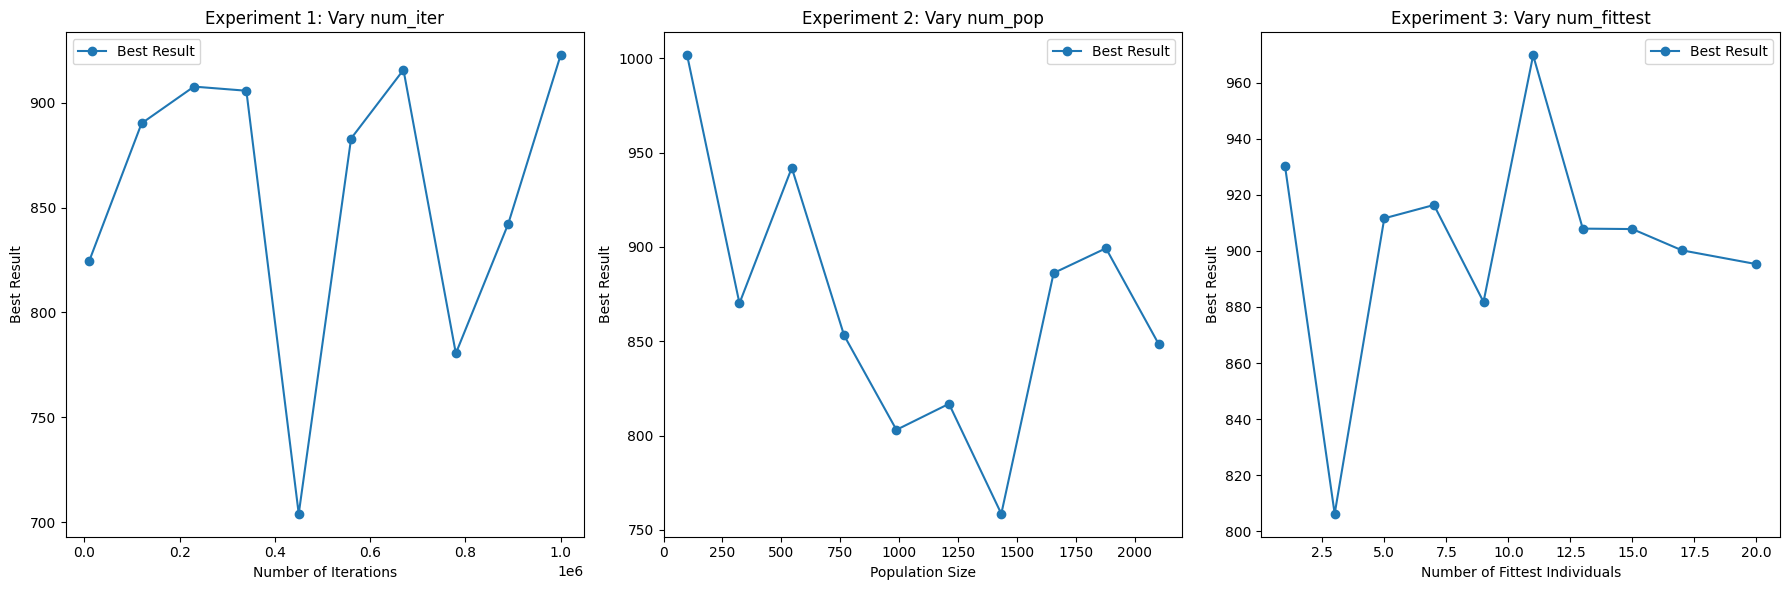

In [73]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.plot(num_iters, best_results_experiment_1, marker='o', label='Best Result')
plt.xlabel('Number of Iterations')
plt.ylabel('Best Result')
plt.title('Experiment 1: Vary num_iter (num_fittest=5, num_pop=300)')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(num_pops, best_results_experiment_2, marker='o', label='Best Result')
plt.xlabel('Population Size')
plt.ylabel('Best Result')
plt.title('Experiment 2: Vary num_pop (num_fittest=5, num_iter=20_000)')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(num_fittest_values, best_results_experiment_3, marker='o', label='Best Result')
plt.xlabel('Number of Fittest Individuals')
plt.ylabel('Best Result')
plt.title('Experiment 3: Vary num_fittest (num_pop=300, num_iter=20_000)')
plt.legend()

plt.tight_layout()
plt.show()

Simulated annealing algorithm experimens

Experiment 1

In [74]:
cooling_rate = 0.9
initial_temps = np.linspace(1e4, 1e9, num = 20)
min_temp = 1e-8
verbose = True
early_stopping = True
patience = 5000

times_experiment_1 = []
best_results_experiment_1 = []

for initial_temp in initial_temps:
    start = time.time()
    best_route_sim, history_sim = simulated_annealing(cities, initial_temp=initial_temp, cooling_rate=cooling_rate,
                                                      min_temp=min_temp, early_stopping=early_stopping, patience=patience)
    end = time.time()
    times_experiment_1.append(end - start)
    best_results_experiment_1.append(np.sort(history_sim)[0])


Temp: 3874.20 | Current Cost: 1695.93 | Best Cost: 1620.85 | Iteration number: 10
Temp: 1350.85 | Current Cost: 1642.23 | Best Cost: 1620.85 | Iteration number: 20
Temp: 471.01 | Current Cost: 1481.18 | Best Cost: 1481.18 | Iteration number: 30
Temp: 164.23 | Current Cost: 1404.52 | Best Cost: 1324.80 | Iteration number: 40
Temp: 57.26 | Current Cost: 1501.20 | Best Cost: 1324.80 | Iteration number: 50
Temp: 19.97 | Current Cost: 1393.26 | Best Cost: 1324.80 | Iteration number: 60
Temp: 6.96 | Current Cost: 1305.29 | Best Cost: 1305.29 | Iteration number: 70
Temp: 2.43 | Current Cost: 1283.09 | Best Cost: 1283.09 | Iteration number: 80
Temp: 0.85 | Current Cost: 1119.38 | Best Cost: 1119.38 | Iteration number: 90
Temp: 0.30 | Current Cost: 1111.11 | Best Cost: 1111.11 | Iteration number: 100
Temp: 0.10 | Current Cost: 1108.92 | Best Cost: 1108.92 | Iteration number: 110
Temp: 0.04 | Current Cost: 1031.27 | Best Cost: 1031.27 | Iteration number: 120
Temp: 0.01 | Current Cost: 1023.11 | 

Experiment 2

In [75]:
initial_temp = 10_000_000
cooling_rates = np.linspace(0.5, 0.95, num = 20)

times_experiment_2 = []
best_results_experiment_2 = []

for cooling_rate in cooling_rates:
    start = time.time()
    best_route_sim, history_sim = simulated_annealing(cities, initial_temp=initial_temp, cooling_rate=cooling_rate,
                                                      min_temp=min_temp, early_stopping=early_stopping, patience=patience)
    end = time.time()
    times_experiment_2.append(end - start)
    best_results_experiment_2.append(np.sort(history_sim)[0])

Temp: 19531.25 | Current Cost: 1722.39 | Best Cost: 1647.86 | Iteration number: 10
Temp: 19.07 | Current Cost: 1625.27 | Best Cost: 1597.16 | Iteration number: 20
Temp: 0.02 | Current Cost: 1438.45 | Best Cost: 1438.45 | Iteration number: 30
Temp: 0.00 | Current Cost: 1344.93 | Best Cost: 1344.93 | Iteration number: 40
Temp: 0.00 | Current Cost: 1319.52 | Best Cost: 1319.52 | Iteration number: 50
Temp: 29622.75 | Current Cost: 1314.89 | Best Cost: 1289.46 | Iteration number: 10
Temp: 45.95 | Current Cost: 1364.20 | Best Cost: 1254.81 | Iteration number: 20
Temp: 0.07 | Current Cost: 1337.42 | Best Cost: 1254.81 | Iteration number: 30
Temp: 0.00 | Current Cost: 1328.37 | Best Cost: 1254.81 | Iteration number: 40
Temp: 0.00 | Current Cost: 1228.35 | Best Cost: 1228.35 | Iteration number: 50
Temp: 44108.03 | Current Cost: 1664.03 | Best Cost: 1529.96 | Iteration number: 10
Temp: 106.49 | Current Cost: 1777.84 | Best Cost: 1529.96 | Iteration number: 20
Temp: 0.26 | Current Cost: 1670.70 |

Results

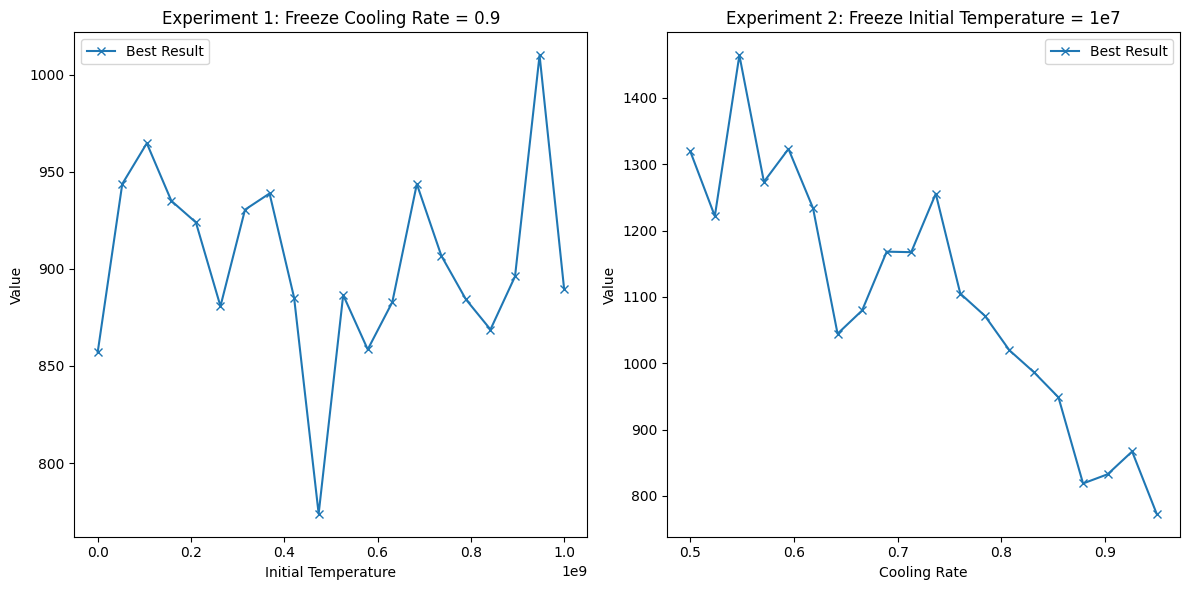

In [77]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
#plt.plot(initial_temps, times_experiment_1, marker='o', label='Time')
plt.plot(initial_temps, best_results_experiment_1, marker='x', label='Best Result')
plt.xlabel('Initial Temperature')
plt.ylabel('Value')
plt.title('Experiment 1: Freeze Cooling Rate = 0.9')
plt.legend()

plt.subplot(1, 2, 2)
#plt.plot(cooling_rates, times_experiment_2, marker='o', label='Time')
plt.plot(cooling_rates, best_results_experiment_2, marker='x', label='Best Result')
plt.xlabel('Cooling Rate')
plt.ylabel('Value')
plt.title('Experiment 2: Freeze Initial Temperature = 1e7')
plt.legend()

plt.tight_layout()
plt.show()
